In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(x_train,y_train),(x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [5]:
x_train_sub,y_train_sub=x_train[:20000],y_train[:20000]
x_val,y_val= x_train[20000:25000], y_train[20000:25000]

In [6]:
x_train_sub =x_train_sub.astype('float32')/255.0
x_val=x_val.astype('float32')/ 255.0
x_test=x_test.astype('float32')/255.0

In [7]:
x_train_sub=np.expand_dims(x_train_sub,-1)
x_val =np.expand_dims(x_val,-1)
x_test =np.expand_dims(x_test,-1)

In [8]:
num_classes=10

In [9]:
import tensorflow as tf

def build_moderate_cnn(num_classes):
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        tf.keras.layers.MaxPooling2D((2, 2)),

        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ])
    return model


In [10]:
import tensorflow as tf
optimizers={
    'SGD': tf.keras.optimizers.SGD(lr=0.01),
    'SGD_Momentum':tf.keras.optimizers.SGD(lr=0.01,momentum=0.9),
    'RMSProp':tf.keras.optimizers.RMSprop(lr=0.001),
    'Adam': tf.keras.optimizers.Adam(lr=0.001),
}
    


In [11]:
histories={}
epochs=10
batch_size=128

for name, opt in optimizers.items():
    print(f"\n---Training with optimizer: {name} ---")
    model=build_moderate_cnn(num_classes)
    model.compile(optimizer=opt,
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])
    history=model.fit(
    x_train_sub,y_train_sub,
    validation_data=(x_val,y_val),
    epochs=epochs,
    batch_size=batch_size,
    verbose=2
    )
    histories[name]=history.history


---Training with optimizer: SGD ---
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
 - 7s - loss: 2.0884 - acc: 0.3237 - val_loss: 1.5872 - val_acc: 0.4840
Epoch 2/10
 - 6s - loss: 1.1262 - acc: 0.6217 - val_loss: 0.9918 - val_acc: 0.6390
Epoch 3/10
 - 6s - loss: 0.8903 - acc: 0.6809 - val_loss: 0.8466 - val_acc: 0.6782
Epoch 4/10
 - 6s - loss: 0.8009 - acc: 0.7075 - val_loss: 0.8304 - val_acc: 0.7068
Epoch 5/10
 - 6s - loss: 0.7441 - acc: 0.7264 - val_loss: 0.9438 - val_acc: 0.6708
Epoch 6/10
 - 6s - loss: 0.7024 - acc: 0.7406 - val_loss: 0.7394 - val_acc: 0.7170
Epoch 7/10
 - 6s - loss: 0.6688 - acc: 0.7490 - val_loss: 0.7408 - val_acc: 0.7170
Epoch 8/10
 - 6s - loss: 0.6403 - acc: 0.7577 - val_loss: 0.6632 - val_acc: 0.7574
Epoch 9/10
 - 6s - loss: 0.6181 - acc: 0.7695 - val_loss: 0.8974 - val_acc: 0.6710
Epoch 10/10
 - 6s - loss: 0.6034 - acc: 0.7756 - val_loss: 0.6322 - val_acc: 0.7660

---Training with optimizer: SGD_Momentum ---
Train on 20000 samples, validate on 5

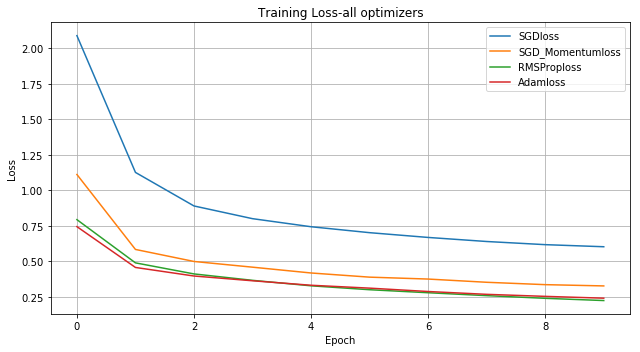

In [12]:
plt.figure(figsize=(9,5))
for name, h in histories.items():
    plt.plot(h['loss'],label=f'{name }loss')
plt.title('Training Loss-all optimizers')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

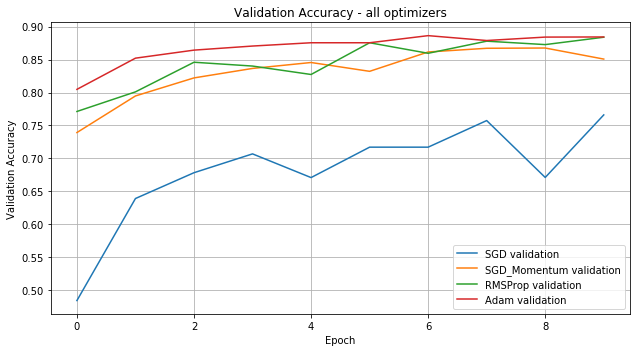

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9,5))
for name, h in histories.items():
    history_dict=h if isinstance(h,dict) else h[0]
    val_key='val_accuracy' if 'val_accuracy' in history_dict else 'val_acc'
    plt.plot(history_dict[val_key],label=f'{name} validation')
plt.title("Validation Accuracy - all optimizers")
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [14]:
print("\nFinal metrics summary (after {} epochs):".format(epochs))
for name,h in histories.items():
    print(f"{name:15s} final loss={h['loss'][-1]:.4f};final val_cc={h['val_accuracy'][-1]:.4f})")


Final metrics summary (after 10 epochs):


KeyError: 'val_accuracy'

In [15]:
print("\nFinal metrics summary (after {} epochs):".format(epochs))

for name, h in histories.items():

    # detect correct metric names
    if "val_accuracy" in h:
        val_key = "val_accuracy"
    else:
        val_key = "val_acc"

    if "accuracy" in h:
        acc_key = "accuracy"
    else:
        acc_key = "acc"

    print(f"{name:15s} final loss={h['loss'][-1]:.4f}; final val_acc={h[val_key][-1]:.4f}")



Final metrics summary (after 10 epochs):
SGD             final loss=0.6034; final val_acc=0.7660
SGD_Momentum    final loss=0.3278; final val_acc=0.8508
RMSProp         final loss=0.2249; final val_acc=0.8840
Adam            final loss=0.2416; final val_acc=0.8844
